In [16]:
!pip install -q pymysql pandas matplotlib

**The provided code sets up logging to write informational messages to a file named 'etl.log', and then logs a message indicating the start of the ETL process.**

In [17]:
import logging
logging.basicConfig(filename='etl.log', level=logging.INFO)
logging.info('ETL process started...')

**his line of code reads data from a CSV file named 'financial_data2.csv' into a pandas DataFrame, which is commonly used in the `extraction phase` of an ETL (Extract, Transform, Load) process.**

In [37]:
import pandas as pd
df = pd.read_csv('financial_data2.csv')

In [19]:
logging.basicConfig(filename='etl.log', level=logging.INFO)
logging.info('Extract data from csv file...')

**Connect to mysql database engine, and use finance_db**

In [38]:
import pymysql

conn = pymysql.connect(
    host='mysql-db',
    user='root',
    password='password',
    database='finance_db'
)

In [20]:
logging.basicConfig(filename='etl.log', level=logging.INFO)
logging.info('connect to mysql engine...')

**These lines of code calculate *total revenue, total expenses, and profit* from the financial data stored in the DataFrame df. In the context of an ETL (Extract, Transform, Load) process, this code represents the `transformation phase` where raw data is processed and aggregated to derive meaningful insights, such as financial metrics.**

In [39]:
# Calculate total revenue
total_revenue = df['amount'].sum()

# Calculate total expenses
total_expenses = df[df['amount'] < 0]['amount'].sum()

# Calculate profit
profit = total_revenue + total_expenses


In [21]:
logging.basicConfig(filename='etl.log', level=logging.INFO)
logging.info('Transform data to calculate profit based on amount...')

In [40]:
cursor = conn.cursor()


**This code iterates over each row in the DataFrame df and inserts the transformed data into a MySQL database table named *transactions*. It uses the "cursor.execute()" method to execute an SQL INSERT statement for each row, inserting values for 'customer_id', 'amount', and 'transaction_date' into their respective columns. Finally, conn.commit() commits the changes to the database. In the ETL (Extract, Transform, Load) process, this represents the `load phase`, where transformed data is loaded into the target database for storage and analysis.**

In [41]:
# Insert transformed data into MySQL database
for index, row in df.iterrows():
    cursor.execute("INSERT INTO transactions (customer_id, amount, transaction_date) VALUES (%s, %s, %s)", 
                   (row['customer_id'], row['amount'], row['transaction_date']))
conn.commit()

In [24]:
logging.basicConfig(filename='etl.log', level=logging.INFO)
logging.info('Load Data to database...')

**This code queries transaction data from a MySQL database table named 'transactions', calculates the total amount of transactions grouped by date, and then plots a time series analysis of the total amount versus date using matplotlib. The resulting plot visualizes the trend of transaction amounts over time, facilitating analysis and insights into financial data patterns.**

/tmp/ipykernel_488/2256257308.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, parse_dates=['transaction_date'])


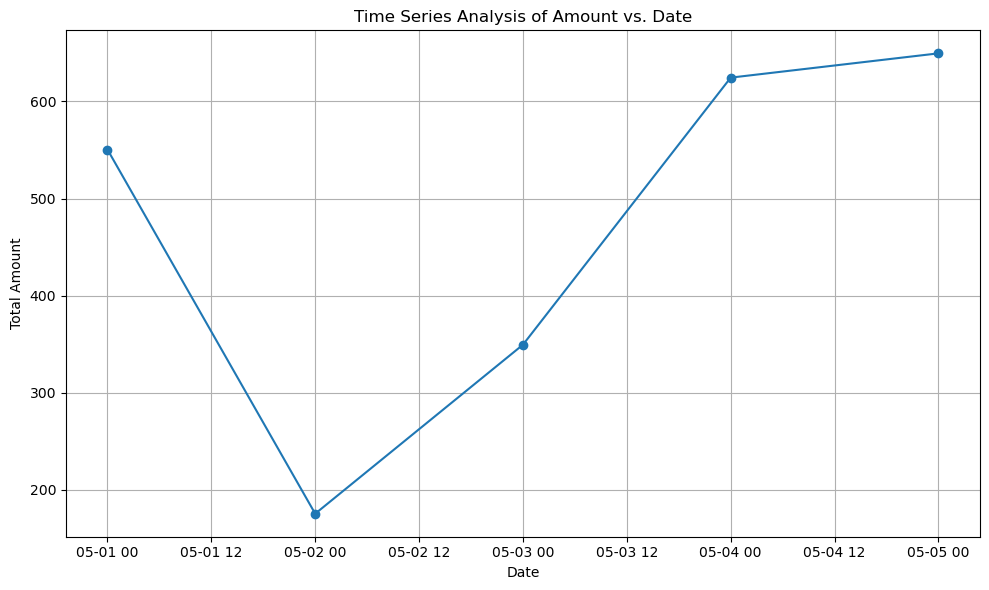

In [45]:
import matplotlib.pyplot as plt

# Query to fetch transaction data
query = """
    SELECT transaction_date, SUM(amount) AS total_amount
    FROM transactions
    GROUP BY transaction_date
    ORDER BY transaction_date
"""

# Fetch data into a DataFrame
df = pd.read_sql(query, conn, parse_dates=['transaction_date'])



# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['transaction_date'], df['total_amount'], marker='o', linestyle='-')
plt.title('Time Series Analysis of Amount vs. Date')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
logging.basicConfig(filename='etl.log', level=logging.INFO)
logging.info('Do some data analytics...')

In [43]:
profit

997.25